In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

data = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')

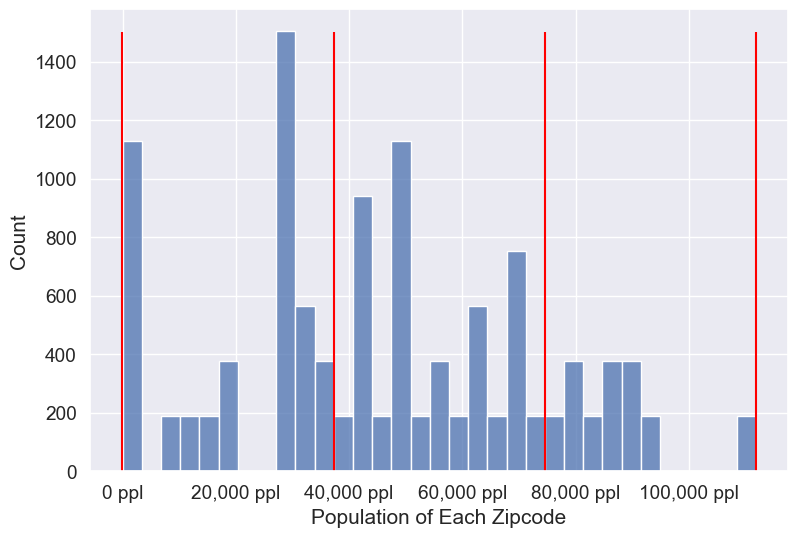

In [40]:
# first, i want to smooth the data
    # in order to create accurate groups within the data for better analysis
        # different population categories for COVID cases
        
# creating 3 bins with equal width within the variable of 'Population'
binned_cut = pd.cut(data['Population'], 3, labels = ['Low', 'Mid', 'High'], retbins = True)

# creating new column in the dataframe
data['Binned_Pop'] = binned_cut[0]

# visualizing the bins for population 
sns.set(font_scale = 1.25)
plt.rcParams["figure.figsize"] = (9, 6)
ax=sns.histplot(data = data, x = 'Population')
plt.vlines(binned_cut[1], 0, 1500, color = 'red') # this line is putting a vertical line at the bin limits
plt.xlabel('Population of Each Zipcode');
plt.ylabel('Count');
ax.xaxis.set_major_formatter('{x:,.0f} ppl')
plt.show()

# the bins have equal width
# but the third bin has significantly less zipcodes
    # this will create a problem
        # low sample size is always harmful to numeric analysis
# i will use qcut instead

In [24]:
# binning with a different method - .qcut
    # not with the same width but with the same number of zipcodes
binned_pop = pd.qcut(data['Population'], 3, labels = ['Low', 'Mid', 'High'], retbins = True)

# creating new column in the dataframe
data['Binned_Pop'] = binned_pop[0]

<Axes: xlabel='Binned_Pop', ylabel='Percent Tested Positive - Cumulative'>

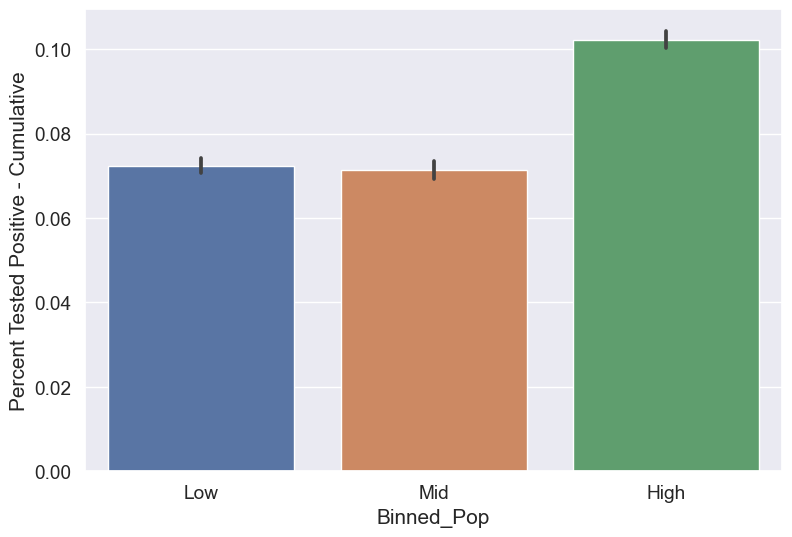

In [25]:
# plotting on a barplot with averages and CIs
sns.barplot(x = 'Binned_Pop', y = 'Percent Tested Positive - Cumulative', data = data)

In [27]:
# date time
data['Week Start'] = pd.to_datetime(data['Week Start'])
data['Week End'] = pd.to_datetime(data['Week End'])
data['Year'] = data['Week Start'].dt.year

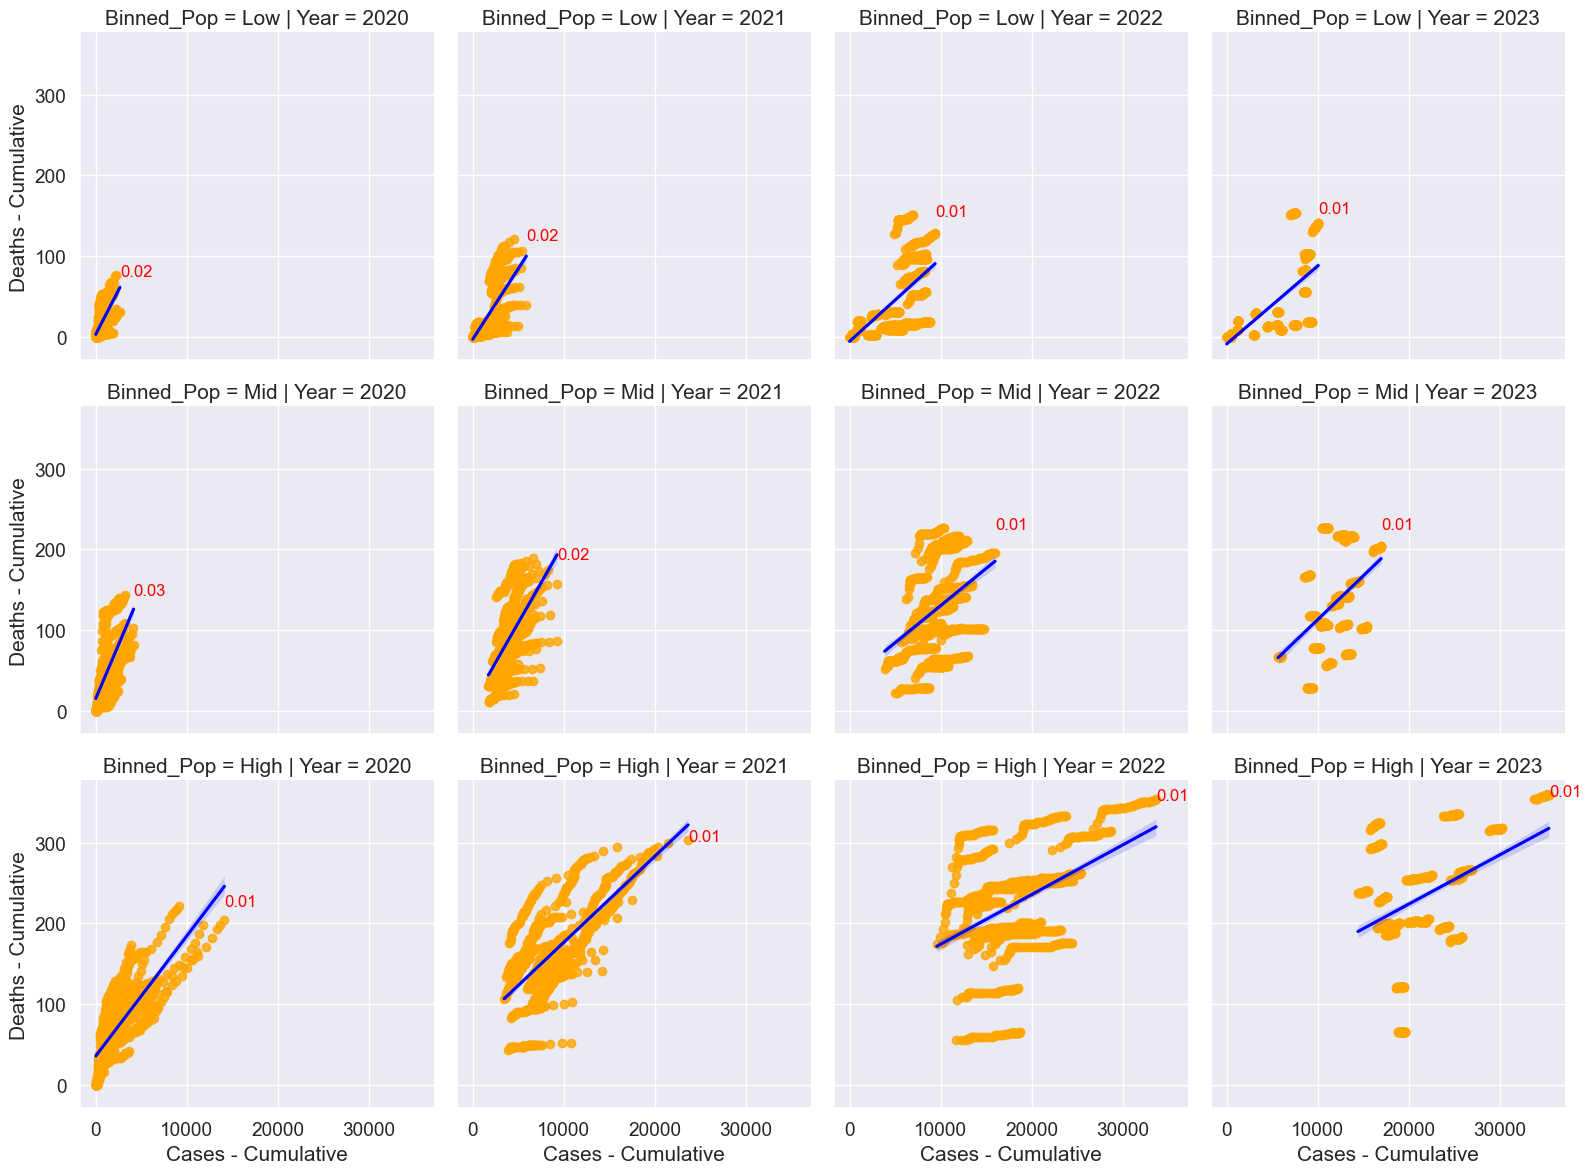

In [31]:
# to better visualize each population
# put each Year to a different subplot
# put each binned population category to a different row at the same time
a = sns.FacetGrid(data, col = 'Year', row = 'Binned_Pop', height = 4, aspect = 1)
a.map(sns.regplot, 'Cases - Cumulative', 'Deaths - Cumulative', scatter_kws = {"color": "orange"}, line_kws = {"color": "blue"})

# add label of slope to each graph using linregress from scipy.stats
for ax in a.axes.flat:
    x, y = ax.collections[0].get_offsets().data.T
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.annotate(round(slope, 2), xy=(max(x) - 1, max(y) - 1), color='red', fontsize=12)